# Turbine EDA and Modeling
Here we are testing to see if we can predict the turbine capacity accurately without weather data.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [68]:
df = pd.read_csv("data/interim/turbine_data.csv")
df

,p_year,t_cap,t_hh,t_rd,t_rsa,t_ttlh,xlong,ylat
0,1999,660.0,65.0,47.0,1734.94,88.4,-101.40830,32.21420
1,1999,660.0,65.0,47.0,1734.94,88.4,-101.35889,32.17590
2,1999,660.0,65.0,47.0,1734.94,88.4,-101.42149,32.21520
3,1999,660.0,65.0,47.0,1734.94,88.4,-101.36119,32.16719
4,2020,2820.0,89.0,127.0,12667.69,152.4,-100.51762,33.01464
...,...,...,...,...,...,...,...,...
8412,2010,1500.0,80.0,77.0,4656.63,118.6,-100.73570,32.47300
8413,2010,1500.0,80.0,77.0,4656.63,118.6,-100.68689,32.45939
8414,2010,1500.0,80.0,77.0,4656.63,118.6,-100.76559,32.47089
8415,2010,1500.0,80.0,77.0,4656.63,118.6,-100.74529,32.48150


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p_year  8417 non-null   int64  
 1   t_cap   8417 non-null   float64
 2   t_hh    8417 non-null   float64
 3   t_rd    8417 non-null   float64
 4   t_rsa   8417 non-null   float64
 5   t_ttlh  8417 non-null   float64
 6   xlong   8417 non-null   float64
 7   ylat    8417 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 526.2 KB


In [70]:
df.describe()

,p_year,t_cap,t_hh,t_rd,t_rsa,t_ttlh,xlong,ylat
count,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000
mean,2014.836046,2263.729951,84.267613,105.357253,9193.534717,136.969229,-100.185478,32.108720
std,6.027442,845.297495,11.594913,24.606749,3924.986789,22.932607,1.591941,2.591561
min,1999.000000,100.000000,37.000000,21.000000,346.360000,47.500000,-103.062450,26.139760
25%,2009.000000,1790.000000,80.000000,87.000000,5944.680000,123.400000,-101.505940,31.177570
50%,2016.000000,2200.000000,80.000000,110.000000,9503.320000,138.100000,-100.587190,32.515690
75%,2020.000000,2771.000000,90.000000,126.000000,12468.980000,152.100000,-99.009960,33.935800
max,2022.000000,5600.000000,119.000000,162.000000,20611.990000,199.900000,-96.572420,36.498510


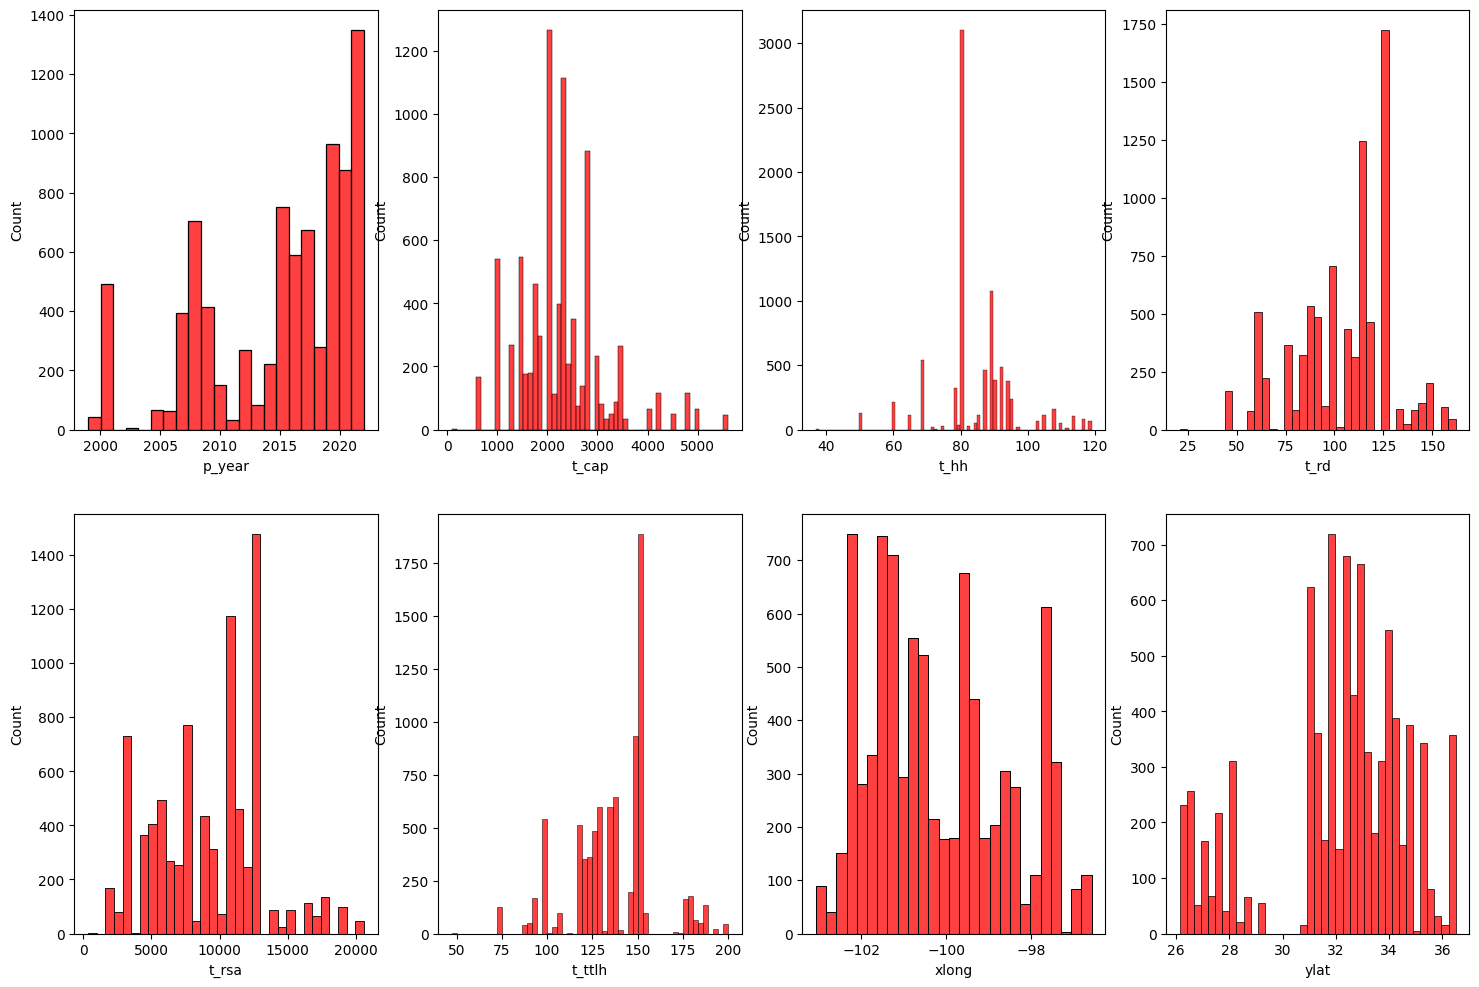

In [71]:
fig, ax = plt.subplots(2, 4, figsize=(18, 12))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4], color = 'red')

In [72]:
print(df.columns)

Index(['p_year', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 'xlong', 'ylat'], dtype='object')


In [73]:
# Cleaning Outliers in features save the xlong and ylat variables
clean_df = df.copy()
drop_xy = clean_df.drop(['xlong','ylat'],axis=1)

for feature in drop_xy.columns:
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)

    IQR = Q3 - Q1

    low_bound = Q1 - (1.5 * IQR)
    high_bound = Q3 + (1.5 * IQR)

    clean_df = clean_df[(clean_df[feature] >= low_bound)&(clean_df[feature] <= high_bound)]

clean_df


,p_year,t_cap,t_hh,t_rd,t_rsa,t_ttlh,xlong,ylat
0,1999,660.0,65.0,47.0,1734.94,88.4,-101.40830,32.21420
1,1999,660.0,65.0,47.0,1734.94,88.4,-101.35889,32.17590
2,1999,660.0,65.0,47.0,1734.94,88.4,-101.42149,32.21520
3,1999,660.0,65.0,47.0,1734.94,88.4,-101.36119,32.16719
4,2020,2820.0,89.0,127.0,12667.69,152.4,-100.51762,33.01464
...,...,...,...,...,...,...,...,...
8412,2010,1500.0,80.0,77.0,4656.63,118.6,-100.73570,32.47300
8413,2010,1500.0,80.0,77.0,4656.63,118.6,-100.68689,32.45939
8414,2010,1500.0,80.0,77.0,4656.63,118.6,-100.76559,32.47089
8415,2010,1500.0,80.0,77.0,4656.63,118.6,-100.74529,32.48150


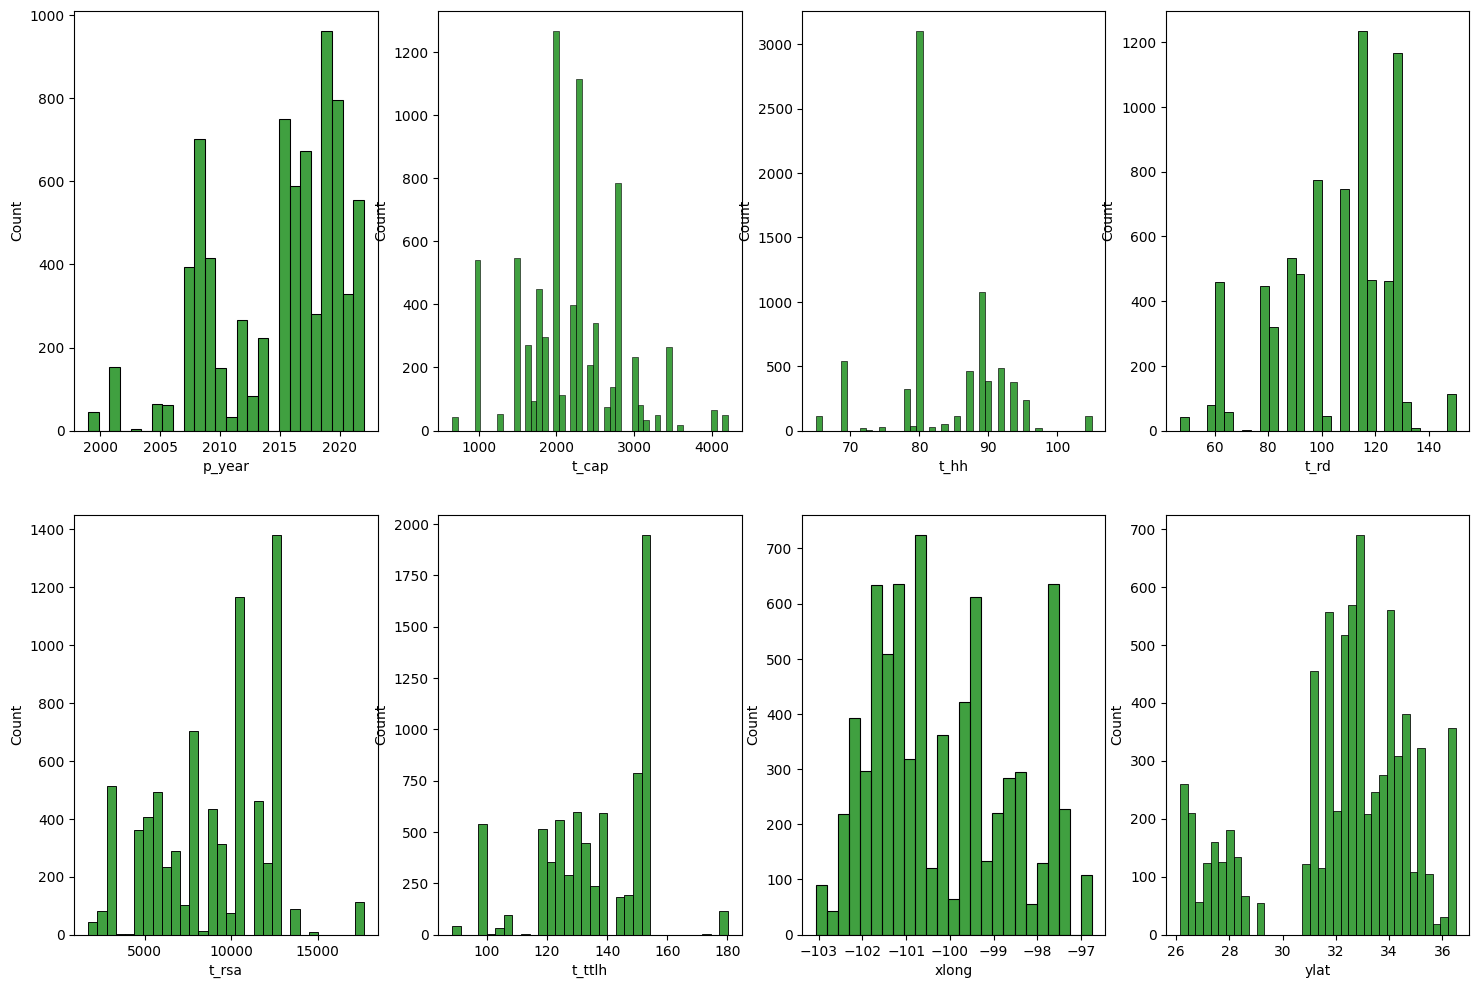

In [74]:
# Cleaned distributions
fig, ax = plt.subplots(2, 4, figsize=(18, 12))

for i, col in enumerate(clean_df.columns):
    sns.histplot(clean_df[col], ax=ax[i//4][i%4], color = 'green')

<Axes: >

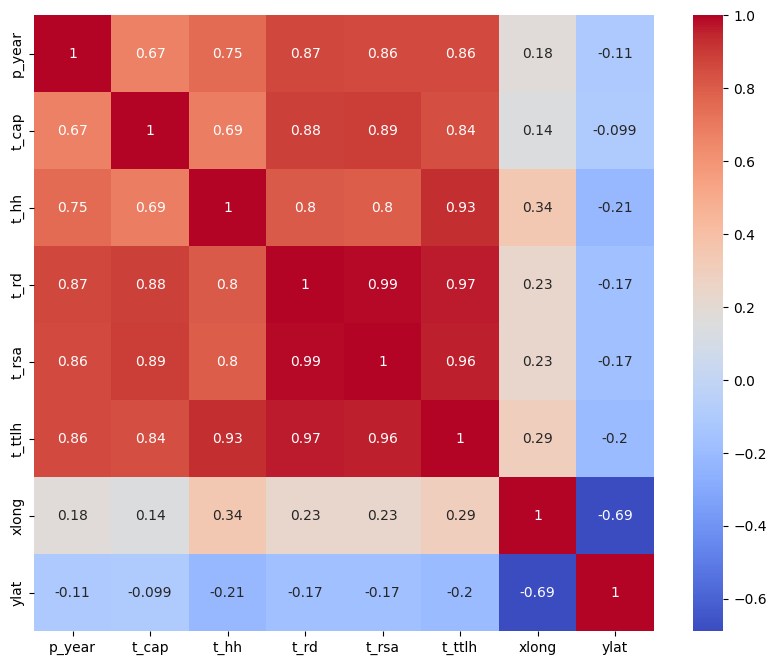

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(clean_df.corr(), cmap="coolwarm", annot=True)

## Dropping t_rsa
Rotor swept area and rotor diameter are functions of each other so we will get rid of t_rsa to reduce multicollinearity 

In [76]:

fin_df = clean_df.drop(['t_rsa'],axis=1)
fin_df

,p_year,t_cap,t_hh,t_rd,t_ttlh,xlong,ylat
0,1999,660.0,65.0,47.0,88.4,-101.40830,32.21420
1,1999,660.0,65.0,47.0,88.4,-101.35889,32.17590
2,1999,660.0,65.0,47.0,88.4,-101.42149,32.21520
3,1999,660.0,65.0,47.0,88.4,-101.36119,32.16719
4,2020,2820.0,89.0,127.0,152.4,-100.51762,33.01464
...,...,...,...,...,...,...,...
8412,2010,1500.0,80.0,77.0,118.6,-100.73570,32.47300
8413,2010,1500.0,80.0,77.0,118.6,-100.68689,32.45939
8414,2010,1500.0,80.0,77.0,118.6,-100.76559,32.47089
8415,2010,1500.0,80.0,77.0,118.6,-100.74529,32.48150


In [1]:
plt.figure(figsize=(10, 8))
sns.heatmap(fin_df.corr(), cmap="coolwarm", annot=True)

NameError: name 'plt' is not defined

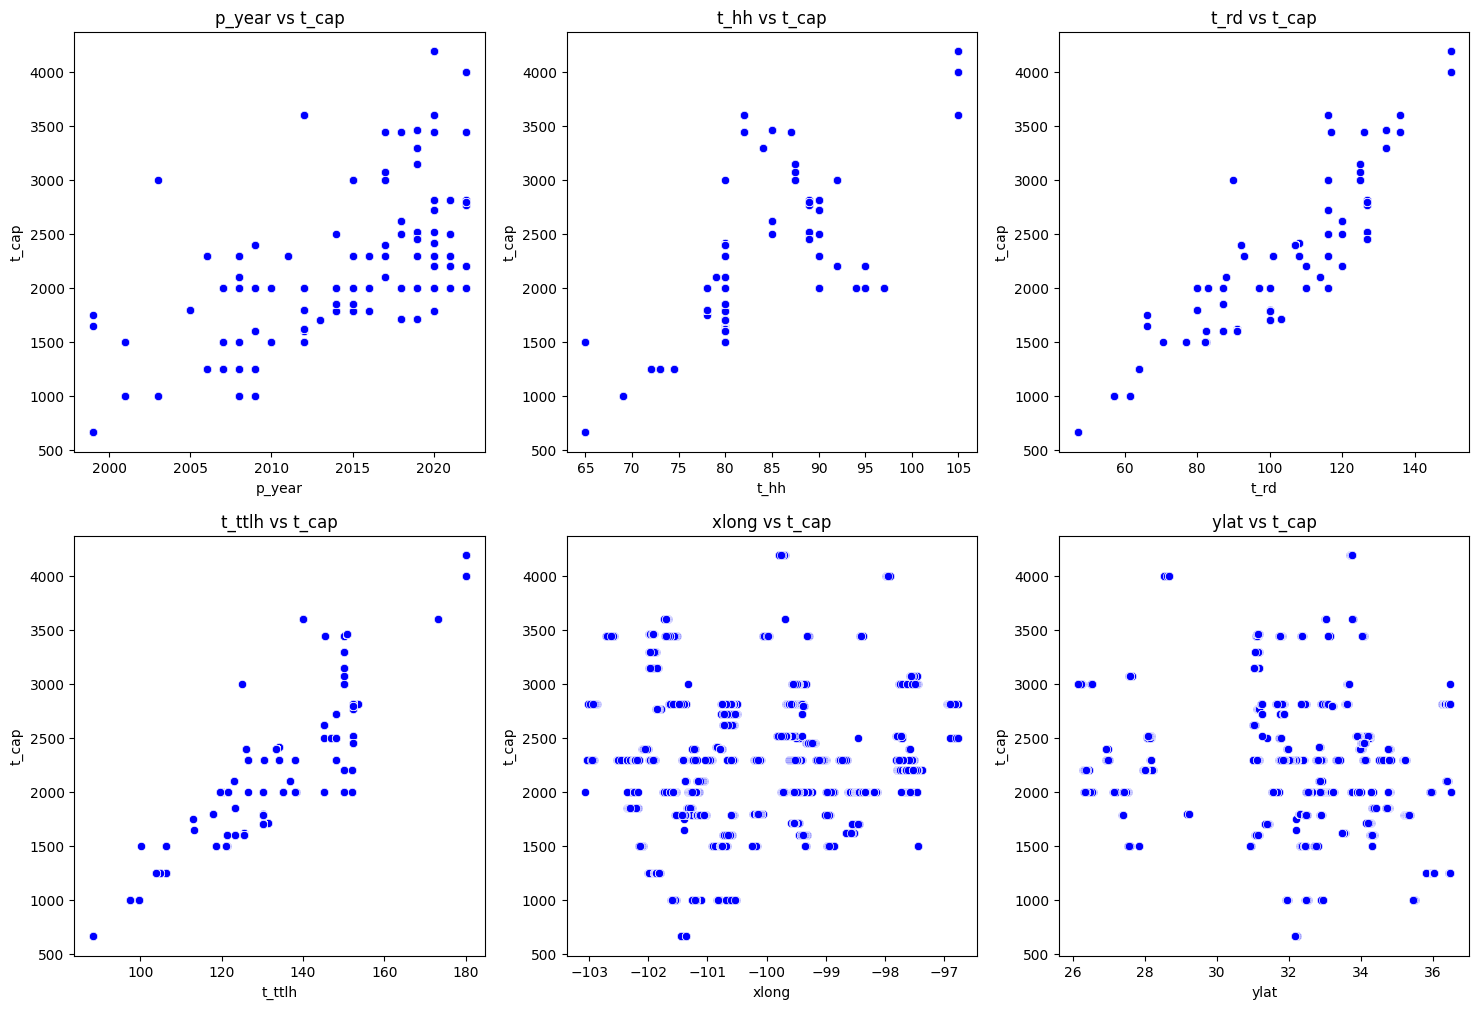

In [78]:
# Assuming you have a DataFrame df with features and the target variable 'target'
test_df = fin_df.drop('t_cap',axis=1)
features = test_df.columns

# Define the layout of subplots
fig, ax = plt.subplots(2, 3, figsize=(18, 12))  # Adjust rows and columns based on the number of features

# Loop through the features and plot each one against the target variable
for i, col in enumerate(features):
    sns.scatterplot(x=fin_df[col], y=fin_df['t_cap'], ax=ax[i//3][i%3], color='blue')
    ax[i//3][i%3].set_title(f'{col} vs t_cap')
    ax[i//3][i%3].set_xlabel(col)
    ax[i//3][i%3].set_ylabel('t_cap')

plt.show()

In [109]:
# fin_df = fin_df.drop(['xlong', 'ylat'], axis=1)

In [110]:
from sklearn.model_selection import train_test_split
import time
X = fin_df.drop('t_cap',axis=1)
y = fin_df['t_cap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state= 0)


In [111]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
# Performance Table
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
import time

performance = pd.DataFrame(columns=['MAE', 'RMSE', 'r^2', 'MAPE', 'Training Time', 'Prediction Time','Time Total'])

In [113]:
def model_performance(model_name, y_predict, y_test,start, end_predict, end_train):
    MAE = mean_absolute_error(y_test, y_predict)
    RMSE = root_mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    MAPE = mean_absolute_percentage_error(y_test, y_predict)


    print(f"MAE: {MAE}")
    print(f"RMSE: {RMSE}")
    print(f"r2: {r2}")
    print(f"MAPE: {MAPE}")
    print(f"time to train: {end_train-start:.2f} s")
    print(f"time to predict: {end_predict-end_train:.2f} s")
    print(f"total: {end_predict-start:.2f} s")
    performance.loc[model_name] = [MAE, RMSE, r2, MAPE,end_train-start,end_predict-end_train,end_predict-start]

## **Linear Regression**

In [114]:
from sklearn.linear_model import LinearRegression
start = time.time()
model = LinearRegression().fit(X_train,y_train)
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()

In [115]:
model_performance('Linear Regression', y_predict, y_test,start, end_predict, end_train)


MAE: 206.35986267298304
RMSE: 260.4162132887459
r2: 0.8333604732422062
MAPE: 0.09489052594846119
time to train: 0.00 s
time to predict: 0.00 s
total: 0.00 s


### Scaled

In [116]:
start = time.time()
model = LinearRegression().fit(X_train_scaled,y_train)
end_train = time.time()
y_predict = model.predict(X_test_scaled) 
end_predict = time.time()

In [117]:
model_performance('Linear Regression (Scaled)', y_predict, y_test,start, end_predict, end_train)


MAE: 206.35986267299026
RMSE: 260.4162132887518
r2: 0.8333604732421985
MAPE: 0.09489052594846613
time to train: 0.00 s
time to predict: 0.00 s
total: 0.00 s


## **Ridge Regression**

In [118]:
from sklearn.linear_model import RidgeCV
start = time.time()
model = RidgeCV(alphas=[.001,.1,1,10,100],cv=10)
model.fit(X_train, y_train)
alpha = model.alpha_
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()

In [119]:
model_performance('Ridge Regression', y_predict, y_test,start, end_predict, end_train)


MAE: 206.39424127419505
RMSE: 260.4387396525494
r2: 0.8333316428947398
MAPE: 0.09491136277336999
time to train: 0.07 s
time to predict: 0.00 s
total: 0.07 s


### Scaled

In [120]:
start = time.time()
model = RidgeCV(alphas=[.001,.1,1,10,100],cv=10)
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
end_train = time.time()
y_predict = model.predict(X_test_scaled) 
end_predict = time.time()

In [121]:
model_performance('Ridge Regression (Scaled)', y_predict, y_test,start, end_predict, end_train)


MAE: 206.43091818647858
RMSE: 260.4639059418853
r2: 0.8332994308915792
MAPE: 0.09493355819925631
time to train: 0.05 s
time to predict: 0.00 s
total: 0.05 s


## **Lasso Regression**

In [122]:
from sklearn.linear_model import LassoCV
start = time.time()
model = LassoCV(alphas=[.0001,.001,.1,1,10],cv=10,max_iter=1000000)
model.fit(X_train, y_train)
alpha = model.alpha_
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()

In [123]:
model_performance('Lasso Regression', y_predict, y_test,start, end_predict, end_train)


MAE: 206.59093823430607
RMSE: 260.5754302397713
r2: 0.8331566460861263
MAPE: 0.09502543720322261
time to train: 3.60 s
time to predict: 0.00 s
total: 3.60 s


### Scaled

In [124]:
start = time.time()
model = LassoCV(alphas=[.00001,.0001,.001],cv=10,max_iter=10000000)
model.fit(X_train_scaled, y_train)
alpha = model.alpha_
end_train = time.time()
y_predict = model.predict(X_test_scaled) 
end_predict = time.time()

In [125]:
model_performance('Lasso Regression (Scaled)', y_predict, y_test,start, end_predict, end_train)


MAE: 206.39131892303723
RMSE: 260.436992187101
r2: 0.833333879476123
MAPE: 0.09490939973484995
time to train: 4.45 s
time to predict: 0.00 s
total: 4.45 s


## **Decision Tree**

In [126]:
from sklearn.tree import DecisionTreeRegressor
start = time.time()
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()

In [127]:
model_performance('Decision Tree', y_predict, y_test,start, end_predict, end_train)


MAE: 3.8300733475739204
RMSE: 14.59807685218936
r2: 0.9994763594433377
MAPE: 0.0015968222128221212
time to train: 0.00 s
time to predict: 0.00 s
total: 0.00 s


### Scaled

In [128]:
start = time.time()
model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)
end_train = time.time()
y_predict = model.predict(X_test_scaled) 
end_predict = time.time()

In [129]:
model_performance('Decision Tree (Scaled)', y_predict, y_test,start, end_predict, end_train)


MAE: 3.8300733475739204
RMSE: 14.59807685218936
r2: 0.9994763594433377
MAPE: 0.0015968222128221212
time to train: 0.00 s
time to predict: 0.00 s
total: 0.00 s


## **Random Forest Regressor**


In [130]:
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor()
model.fit(X_train, y_train)
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()

In [131]:
model_performance('Random Forest', y_predict, y_test,start, end_predict, end_train)


MAE: 3.9115422542340497
RMSE: 14.361509627902286
r2: 0.9994931935050486
MAPE: 0.0016084006942096282
time to train: 0.11 s
time to predict: 0.01 s
total: 0.11 s


### Scaled

In [132]:
start = time.time()
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
end_train = time.time()
y_predict = model.predict(X_test_scaled) 
end_predict = time.time()

In [133]:
model_performance('Random Forest (Scaled)', y_predict, y_test,start, end_predict, end_train)


MAE: 3.818369522151975
RMSE: 13.92307653904611
r2: 0.9995236650964856
MAPE: 0.0015630228982760107
time to train: 0.11 s
time to predict: 0.01 s
total: 0.12 s


## **Gradient Boosting Regressor**

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

start = time.time()
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
end_train = time.time()
y_predict = model.predict(X_test) 
end_predict = time.time()


In [135]:
model_performance('Gradient Boosting', y_predict, y_test,start, end_predict, end_train)

MAE: 29.9671787553299
RMSE: 48.21007732869528
r2: 0.9942889279303502
MAPE: 0.014157282254920186
time to train: 0.08 s
time to predict: 0.00 s
total: 0.09 s


### Scaled

In [136]:
start = time.time()
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
end_train = time.time()
y_predict = model.predict(X_test_scaled) 
end_predict = time.time()

In [137]:
model_performance('Gradient Boosting (Scaled)', y_predict, y_test,start, end_predict, end_train)

MAE: 30.031025816383966
RMSE: 48.62403142276996
r2: 0.9941904310384494
MAPE: 0.014199846962289556
time to train: 0.08 s
time to predict: 0.00 s
total: 0.08 s


In [138]:
performance

,MAE,RMSE,r^2,MAPE,Training Time,Prediction Time,Time Total
Linear Regression,206.359863,260.416213,0.833360,0.094891,0.000997,0.000000,0.000997
Linear Regression (Scaled),206.359863,260.416213,0.833360,0.094891,0.000000,0.000997,0.000997
Ridge Regression,206.394241,260.438740,0.833332,0.094911,0.072756,0.000000,0.072756
Ridge Regression (Scaled),206.430918,260.463906,0.833299,0.094934,0.045924,0.000000,0.045924
Lasso Regression,206.590938,260.575430,0.833157,0.095025,3.600549,0.000000,3.600549
Lasso Regression (Scaled),206.391319,260.436992,0.833334,0.094909,4.452252,0.000000,4.452252
Decision Tree,3.830073,14.598077,0.999476,0.001597,0.002990,0.000000,0.002990
Decision Tree (Scaled),3.830073,14.598077,0.999476,0.001597,0.002989,0.000000,0.002989
Random Forest,3.911542,14.361510,0.999493,0.001608,0.105648,0.008969,0.114617
Random Forest (Scaled),3.818370,13.923077,0.999524,0.001563,0.108635,0.007973,0.116609


### Results

The Decision Tree and Random Forest models seemed to perform the best, however let's see if adding weather data could increase the accuracy and reduce the error for the other models.